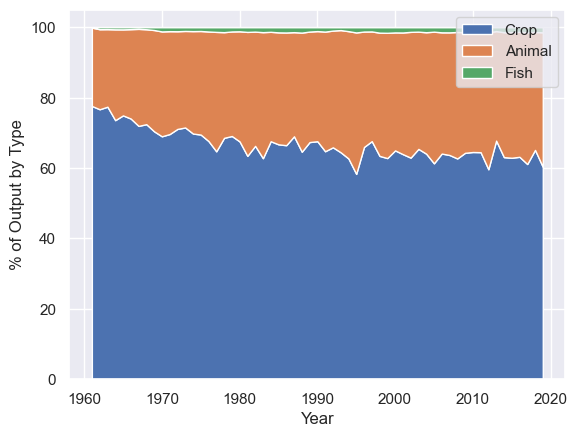

In [56]:
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class DataDownloader:
    """
    A class that downloads a CSV file from a given URL and saves it in a local directory,
    and then loads it into a pandas DataFrame.
    """
    def __init__(self):
        """
        Initializes the DataDownloader instance.

        Parameters:
        url (str): The URL from which to download the CSV file.
        """
        agri_df = pd.read_csv("downloads/agriculture_dataset.csv")
        self.agri_df = agri_df

    def countries_list(self):
        """
        Returns: 
        list: All the countries available in the dataset.
        """
        countries = self.agri_df["Entity"].unique()
        return list(countries)
    
    def area_chart (self, country: str, normalize: bool):
        """
        AAA
        
        Returns:
        
        """
        sns.set_theme()
        output_df = self.agri_df[["Entity", 
                                  "Year",
                                  "output_quantity", 
                                  "crop_output_quantity",
                                "animal_output_quantity",
                                 "fish_output_quantity"]]
        
        if country in self.countries_list():
            plot_df = output_df[output_df["Entity"] == country]
            
            if normalize is False:
                plt.stackplot(plot_df["Year"],
                              plot_df["crop_output_quantity"]/10**9,
                              plot_df["animal_output_quantity"]/10**9,
                              plot_df["fish_output_quantity"]/10**9)
           
            plt.ylabel("Output Quantity by Type (Billions)")
            
            if normalize is True:
                plt.stackplot(plot_df["Year"],
                              (plot_df["crop_output_quantity"]/plot_df["output_quantity"])*100,
                              (plot_df["animal_output_quantity"]/plot_df["output_quantity"])*100,
                              (plot_df["fish_output_quantity"]/plot_df["output_quantity"])*100)
                
                plt.ylabel("% of Output by Type")
                
            plt.xlabel("Year")
            plt.legend(["Crop", "Animal", "Fish"])
            
        elif country in [None, "World"]:
            yearly_total = output_df["output_quantity"].groupby("Year").sum()
            
            if normalize is False:
                plt.stackplot(output_df["Year"],
                              output_df["crop_output_quantity"].groupby("Year").sum()/10**9,
                              output_df["animal_output_quantity"].groupby("Year").sum()/10**9,
                              output_df["fish_output_quantity"].groupby("Year").sum()/10**9)
                
                plt.ylabel("Output Quantity by Type (Billions)")
                
            if normalize is True:
                plt.stackplot(output_df["Year"],
                              (output_df["crop_output_quantity"].groupby("Year").sum()/yearly_total)*100,
                              (output_df["animal_output_quantity"].groupby("Year").sum()/yearly_total)*100,
                              (output_df["fish_output_quantity"].groupby("Year").sum()/yearly_total)*100)
                
                plt.ylabel("% of Output by Type")
                
            plt.xlabel("Year")
            plt.legend(["Crop", "Animal", "Fish"])
        
        else:
            raise ValueError("Inserted Country is not in Dataset")
                        
            
dd = DataDownloader()
dd.area_chart("Spain", True)


In [55]:
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataDownloader:
    """
    A class that downloads a CSV file from a given URL and saves it in a local directory,
    and then loads it into a pandas DataFrame.
    """

    def __init__(self):
        """
        Initializes the DataDownloader instance.

        Parameters:
        url (str): The URL from which to download the CSV file.
        """
        self.url = "https://raw.githubusercontent.com/owid/owid-\
        \datasets/master/datasets/Agricultural%20total%20factor%20productivity%20(USDA)/\
        Agricultural%20total%20factor%20productivity%20(USDA).csv"
        
        directory = "downloads"
        root_directory = os.path.abspath(os.path.dirname(__file__))
        downloads_directory = os.path.join(root_directory, directory)
        
        self.directory = downloads_directory
        self.agri_df = self.download_and_read_file()

    def download_and_read_file(self):
        """
        Downloads the CSV file from the specified URL and saves it in the `downloads` directory.
        If the file is already present in the directory, it loads the file into a pandas DataFrame.
        Otherwise, it creates the directory, downloads the file, and then loads it into a DataFrame.

        Returns:
        pandas.DataFrame: The loaded pandas DataFrame.
        """
        file_name = "agriculture_dataset.csv"
        file_path = os.path.join(self.directory, file_name)

        if os.path.exists(file_path):
            print(f"{file_name} already exists in {self.directory}")
        else:
            if not os.path.exists(self.directory):
                os.makedirs(self.directory)
                print(f"Downloading {file_name}...")
                urllib.request.urlretrieve(self.url, file_path)
                print(f"{file_name} downloaded to {self.directory}")

        agri_df = pd.read_csv(file_path)
        return agri_df
    
        def download_and_read_file(self):
            """
            Downloads the CSV file from the specified URL and saves it in the `downloads` directory.
            If the file is already present in the directory, it loads the file into a pandas DataFrame.
            Otherwise, it creates the directory, downloads the file, and then loads it into a DataFrame.

            Returns:
            pandas.DataFrame: The loaded pandas DataFrame.
            """
            file_name = "agriculture_dataset.csv"
            file_path = os.path.join(self.directory, file_name)

            if os.path.exists(file_path):
                print(f"{file_name} already exists in {self.directory}")
            else:
                if not os.path.exists(self.directory):
                    os.makedirs(self.directory)
                    print(f"Downloading {file_name}...")
                    urllib.request.urlretrieve(self.url, file_path)
                    print(f"{file_name} downloaded to {self.directory}")

        agri_df = pd.read_csv(file_path)
        return agri_df

    def countries_list(self):
        """
        Returns:
        list: All the countries available in the dataset.
        """
        countries = self.agri_df["Entity"].unique()
        return list(countries)
    def area_chart (self, country:str, normalize:bool):
        """
        AAA
        Returns:
        """
        sns.set_theme()
        output_df = self.agri_df[["Entity",
                                "Year",
                                "output_quantity",
                                "crop_output_quantity",
                                "animal_output_quantity",
                                "fish_output_quantity"]]
        if country in self.countries_list():
            plot_df = output_df[output_df["Entity"]==country]
            if normalize is False:
                plt.stackplot(plot_df["Year"],
                              plot_df["crop_output_quantity"]/10**9,
                              plot_df["animal_output_quantity"]/10**9,
                              plot_df["fish_output_quantity"]/10**9)
            plt.ylabel("Output Quantity by Type (Billions)")
            if normalize is True:
                plt.stackplot(plot_df["Year"],
                              (plot_df["crop_output_quantity"]/plot_df["output_quantity"])*100,
                              (plot_df["animal_output_quantity"]/plot_df["output_quantity"])*100,
                              (plot_df["fish_output_quantity"]/plot_df["output_quantity"])*100)
                plt.ylabel("% of Output by Type")
                
            plt.xlabel("Year")
            plt.legend(["Crop", "Animal", "Fish"])
            
        elif country in [None, "World"]:
            yearly_total = output_df["output_quantity"].groupby("Year").sum()
            if normalize is False:
                plt.stackplot(output_df["Year"],
                              output_df["crop_output_quantity"].groupby("Year").sum()/10**9,
                              output_df["animal_output_quantity"].groupby("Year").sum()/10**9,
                              output_df["fish_output_quantity"].groupby("Year").sum()/10**9)
                plt.ylabel("Output Quantity by Type (Billions)")
                
            if normalize is True:
                plt.stackplot(output_df["Year"],
                              (output_df["crop_output_quantity"].groupby("Year")\
                               .sum()/yearly_total)*100,
                              (output_df["animal_output_quantity"].groupby("Year")\
                               .sum()/yearly_total)*100,
                              (output_df["fish_output_quantity"].groupby("Year")\
                               .sum()/yearly_total)*100)
                plt.ylabel("% of Output by Type")
                
            plt.xlabel("Year")
            plt.legend(["Crop", "Animal", "Fish"])
        
        else:
            raise ValueError("Inserted Country is not in Dataset")
                        
dd = DataDownloader()
dd.area_chart("Italy", True)

NameError: name '__file__' is not defined